# Examine RadarSAT2 Archive for a particular location

# (GOOD!) Now that MDA is part of Maxar, it seems new and better search finally exists!
https://gsiportal.mdacorporation.com/gc_cp/#/map 

###### (BAD) full catalog search as of 10/2018:
https://www.eodms-sgdot.nrcan-rncan.gc.ca/index_en.jsp 


###### (BAD) old catalog search allows downloading csvs:
https://neodf.nrcan.gc.ca/neodf_cat3/index.php?lang=en#



In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from pandas.plotting import table
import matplotlib.dates as mdates

In [7]:
%matplotlib inline
#%qtconsole

In [8]:
pwd

'/Users/scott/Documents/GitHub/snowex/snowex2019'

In [9]:
ls /Users/scott/Documents/Research/Stereo2SWE/RS2/

boise-rs2-search.geojson     gm-search.table
boise-rs2-search.kml         grandmesa-aoi.geojson
gm-aoi.kml                   reynolds-rs2-search.geojson
gm-rs2-search.geojson        reynolds-rs2-search.kml
gm-rs2-search.kml


In [10]:
vectorFile = '/Users/scott/Documents/Research/Stereo2SWE/UAVSAR/Name_REY1NS_167aa.geojson'

# Reynolds Creek

In [11]:
# Doesn't work so well.
#import fiona
#fiona.drvsupport.supported_drivers['kml'] = 'rw' 
#fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' 
#gf = gpd.read_file('/Users/scott/Documents/Research/Stereo2SWE/RS2/gm-rs2-search.kml')
#gf.head()

In [12]:
gf = gpd.read_file('/Users/scott/Documents/Research/Stereo2SWE/RS2/reynolds-rs2-search.geojson')
gf.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,2018-11-11T01:45:32,\nGeoCenter Feature ID: 6a32a5ae-d23a-4bd7-b18...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-117.9843999351269 44.06823018119...
1,2018-10-08T13:49:00,\nGeoCenter Feature ID: 1eab7e39-da89-4a25-9d2...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-117.2148451644263 43.58844744569...
2,2018-10-01T13:53:12,\nGeoCenter Feature ID: 4e85042b-ca2b-4e0c-be7...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-118.2666954350473 43.58754786440...
3,2018-09-24T01:45:35,\nGeoCenter Feature ID: 9e94c31e-f560-4dc9-9dc...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-117.9825500811744 44.06791163961...
4,2018-08-31T01:45:19,\nGeoCenter Feature ID: 2f49ac67-f884-4a43-a24...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-117.822850879572 43.327316588423...


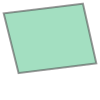

In [13]:
gf.Name.iloc[0]
gf.geometry.iloc[0]

In [14]:
# function to split description into columns

#test = gf.description.iloc[0]
kml2dict = {}
for i,entry in gf.iterrows():
    lines = entry.description.strip('\n').split('\n')
    attr = {}
    attr['Name'] = entry.Name
    attr['geometry'] = entry.geometry
    for line in lines:
        #print(line)
        k,v = line.split(': ')
        attr[k] = v

    
    kml2dict[i] = attr

In [15]:
gf = gpd.GeoDataFrame(kml2dict)
gf = gf.transpose()
gf['Path'] = gf['Relative Orbit Number'].astype(float).apply(int)
gf['Date'] = gf.Name.str[:10]
gf.head()

,Absolute Orbit Number,Acquisition End Time,Acquisition Start Time,Beam Mode,Beam Position,GeoCenter Feature ID,Image ID,Incidence Angle,Name,Polarization,Relative Orbit Number,Scene Number,Spacecraft Orientation,Swath Direction,geometry,Path,Date
0,56945.11772,2018-11-11T01:45:51.680Z,2018-11-11T01:45:32.809Z,Extra Fine,XF0W3,6a32a5ae-d23a-4bd7-b188-2b9ecc0ce98f,679622,41.169083,2018-11-11T01:45:32,HH,114.11772,1,RIGHT,Ascending,(POLYGON Z ((-117.9843999351269 44.06823018119...,114,2018-11-11
1,56466.37707,2018-10-08T13:49:24.308Z,2018-10-08T13:49:00.152Z,Extra Fine,XF0W3,1eab7e39-da89-4a25-9d21-63c58f3ead1c,671783,41.162266,2018-10-08T13:49:00,HH,321.37707,2,RIGHT,Descending,(POLYGON Z ((-117.2148451644263 43.58844744569...,321,2018-10-08
2,56366.37707,2018-10-01T13:53:36.479Z,2018-10-01T13:53:12.323Z,Extra Fine,XF0W3,4e85042b-ca2b-4e0c-be7a-576481d8dae8,670080,41.179615,2018-10-01T13:53:12,HH,221.37707,2,RIGHT,Descending,(POLYGON Z ((-118.2666954350473 43.58754786440...,221,2018-10-01
3,56259.11772,2018-09-24T01:45:54.315Z,2018-09-24T01:45:35.444Z,Extra Fine,XF0W3,9e94c31e-f560-4dc9-9dc2-540003021aac,668325,41.17601,2018-09-24T01:45:35,HH,114.11772,1,RIGHT,Ascending,(POLYGON Z ((-117.9825500811744 44.06791163961...,114,2018-09-24
4,55916.10775,2018-08-31T01:45:42.796Z,2018-08-31T01:45:19.761Z,Extra Fine,XF0W3,2f49ac67-f884-4a43-a242-1b7e78b2cde3,662522,41.132267,2018-08-31T01:45:19,HH,114.10775,3,RIGHT,Ascending,(POLYGON Z ((-117.822850879572 43.327316588423...,114,2018-08-31


In [16]:
print('Total acquisitions:', len(gf))
print('Beam Mode:', gf['Beam Mode'].unique())
print('Beam Position:', gf['Beam Position'].unique())
print('Polarizations:', gf['Polarization'].unique())
print('Relative Orbits', gf['Path'].unique())
#print('Relative Orbits', gf['Relative Orbit Number'].unique())

Total acquisitions: 73
Beam Mode: ['Extra Fine' 'ScanSAR Wide' 'Wide Fine']
Beam Position: ['XF0W3' 'SCWA' 'F0W2']
Polarizations: ['HH' 'HH+HV']
Relative Orbits [114 321 221 171  71  14  21 264 178 121  78 257]


In [17]:
gf.keys()

Index(['Absolute Orbit Number', 'Acquisition End Time',
       'Acquisition Start Time', 'Beam Mode', 'Beam Position',
       'GeoCenter Feature ID', 'Image ID', 'Incidence Angle', 'Name',
       'Polarization', 'Relative Orbit Number', 'Scene Number',
       'Spacecraft Orientation', 'Swath Direction', 'geometry', 'Path',
       'Date'],
      dtype='object')

In [20]:
# Simple groupby beam mode counts
# Need to also sort by relative orbit number!
mode =  'Extra Fine'
#cols =  ['date','Scene Number', 'Swath Direction']
cols =  ['Date','Scene Number', 'Swath Direction', 'Path']
sort = ['Swath Direction','Path','Scene Number']
#gf[('Beam Mode' == 'Extra Fine')]
gf.loc[gf['Beam Mode'] == 'Extra Fine', cols].groupby(sort).count()

Date
Swath Direction Path Scene Number      
Ascending       114  1                7
                     2                4
                     3                6
Descending      221  2                6
                321  2                5
                     3                2

In [21]:
# Extract particular path
#save = gf.loc[gf['Path'] == 128]
#save
#gf.keys()

In [22]:
# Rename to dinosar conventions
gf.rename(columns={"Date" : 'sceneDate', 
                "Path" : 'relativeOrbit', 
                "Swath Direction" : 'flightDirection',
                "Image ID" : 'sceneId',
                "Beam Mode" : 'opMode',
                "Beam Position" : 'beamNo',
                "Scene Number" : 'frame',
                "Incidence Anggle" : 'incidence',
                "Polarization" : 'polarization'}, 
         inplace=True)
#gf.to_file('query-alos2-dinosar.geojson', driver='GeoJSON')

In [23]:
# Plot these frames on a map
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.img_tiles import GoogleTiles

In [24]:
def plot_map(gf, snwe, vectorFile=None, zoom=8, title='Orbital Footprints', tableFrame=None):
    pad = 1
    S, N, W, E = snwe
    plot_CRS = ccrs.PlateCarree()
    geodetic_CRS = ccrs.Geodetic()
    x0, y0 = plot_CRS.transform_point(W-pad, S-pad, geodetic_CRS)
    x1, y1 = plot_CRS.transform_point(E+pad, N+pad, geodetic_CRS)

    fig, ax = plt.subplots(figsize=(5, 5), dpi=150,
                           subplot_kw=dict(projection=plot_CRS))

    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    url = 'http://tile.stamen.com/terrain/{z}/{x}/{y}.png'
    tiler = GoogleTiles(url=url)
    # NOTE: going higher than zoom=8 is slow...
    ax.add_image(tiler, zoom)

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='110m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='k', linestyle=':')
    ax.coastlines(resolution='10m', color='black', linewidth=2)
    ax.add_feature(cfeature.BORDERS)
    
    if type(tableFrame) == gpd.geodataframe.GeoDataFrame:
        table(ax, tableFrame, loc='top', zorder=10, fontsize=10,
          cellLoc='center', rowLoc='center',
          bbox=[0.1, 0.7, 0.6, 0.3]) 

    # Add region of interest polygon in specified
    if vectorFile:
        tmp = gpd.read_file(vectorFile)
        ax.add_geometries(tmp.geometry.values,
                          ccrs.PlateCarree(),
                          facecolor='none',
                          edgecolor='m',
                          lw=2,
                          linestyle='dashed')

    orbits = gf.relativeOrbit.unique()
    colors = plt.cm.jet(np.linspace(0, 1, orbits.size))

    for orbit, color in zip(orbits, colors):
        df = gf.query('relativeOrbit == @orbit')
        poly = df.geometry.cascaded_union

        if df.flightDirection.iloc[0] == 'ASCENDING':
            linestyle = '--'
            xpos, ypos = poly.centroid.x, poly.bounds[3]
        else:
            linestyle = '-'
            xpos, ypos = poly.centroid.x, poly.bounds[1]

        ax.add_geometries([poly],
                          ccrs.PlateCarree(),
                          facecolor='none',
                          edgecolor=color,
                          lw=2,
                          linestyle=linestyle)
        ax.text(xpos, ypos, orbit, color=color, fontsize=16, fontweight='bold',
                transform=geodetic_CRS)

    gl = ax.gridlines(plot_CRS, draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    plt.title(title)
    plt.savefig('map.pdf', bbox_inches='tight')

In [25]:
def plot_timeline(gf, title='Acquisition Timeline'):
    """Plot dinosar inventory acquisitions as a timeline.

    Parameters
    ----------
    gf :  GeoDataFrame
        A geopandas GeoDataFrame

    """

    # Same colors as map
    orbits = gf.relativeOrbit.unique()
    colors = plt.cm.jet(np.linspace(0, 1, orbits.size))

    fig, ax = plt.subplots(figsize=(11, 8.5))
    plt.scatter(gf.timeStamp.values, gf.orbitCode.values,
                edgecolors=colors[gf.orbitCode.values], facecolors='None',
                cmap='jet', s=60, label='ALOS-2')

    plt.yticks(gf.orbitCode.unique(), gf.relativeOrbit.unique())

    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.legend(loc='lower right')
    plt.ylim(-1, orbits.size)
    plt.ylabel('Orbit Number')
    fig.autofmt_xdate()
    plt.title(title)
    plt.savefig('timeline.pdf', bbox_inches='tight')

In [26]:
def print_dates(GF):
    ''' print list of dates from dataframe'''
    tmp = GF.loc[:, ['sceneId','sceneDate']].reset_index(drop=True)
    tmp.loc[:, 'timeStamp'] = pd.to_datetime(tmp.sceneDate)
    tmp['date'] = tmp.sceneDate.str[:10]
    timeDeltas = tmp.timeStamp.diff()
    tmp['dt'] = timeDeltas.dt.days
    tmp.loc[0, 'dt'] = 0
    tmp['dt'] = tmp.dt.astype('i2')
    return tmp.loc[:, ['date','dt']]

In [30]:
# Generate plots for all possible interferometric pairs (with dinosar naming scheme)
gf = gf.query('opMode == "Extra Fine"')

order = ["flightDirection", "opMode", "relativeOrbit", "frame", "beamNo"]
GF = gf.groupby(order).filter(lambda x: len(x["sceneId"]) > 2)
# Reprint summary as groupby object

w, s, e, n = GF.geometry.cascaded_union.bounds
snwe = [s, n, w, e]

GF.groupby(order)["sceneId"].count()

flightDirection  opMode      relativeOrbit  frame  beamNo
Ascending        Extra Fine  114            1      XF0W3     7
                                            2      XF0W3     4
                                            3      XF0W3     6
Descending       Extra Fine  221            2      XF0W3     6
                             321            2      XF0W3     5
Name: sceneId, dtype: int64

In [31]:
GB = GF.groupby(order)["sceneId"]
print(GB.groups)

{('Ascending', 'Extra Fine', 114, '1', 'XF0W3'): Int64Index([0, 3, 7, 9, 10, 17, 23], dtype='int64'), ('Ascending', 'Extra Fine', 114, '2', 'XF0W3'): Int64Index([24, 26, 27, 30], dtype='int64'), ('Ascending', 'Extra Fine', 114, '3', 'XF0W3'): Int64Index([4, 8, 13, 39, 42, 44], dtype='int64'), ('Descending', 'Extra Fine', 221, '2', 'XF0W3'): Int64Index([2, 6, 33, 38, 41, 45], dtype='int64'), ('Descending', 'Extra Fine', 321, '2', 'XF0W3'): Int64Index([1, 5, 11, 40, 43], dtype='int64')}


In [35]:
#inventory = GF.loc[indices]
#inventory.sceneDate.dtype

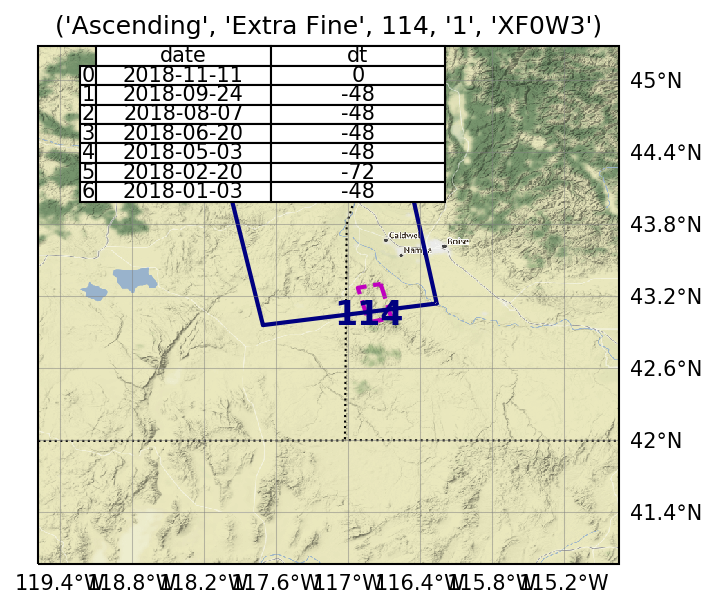

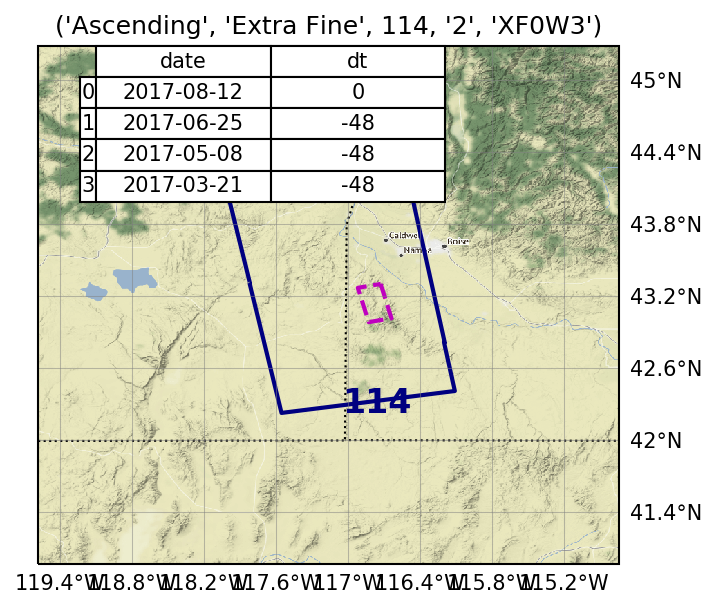

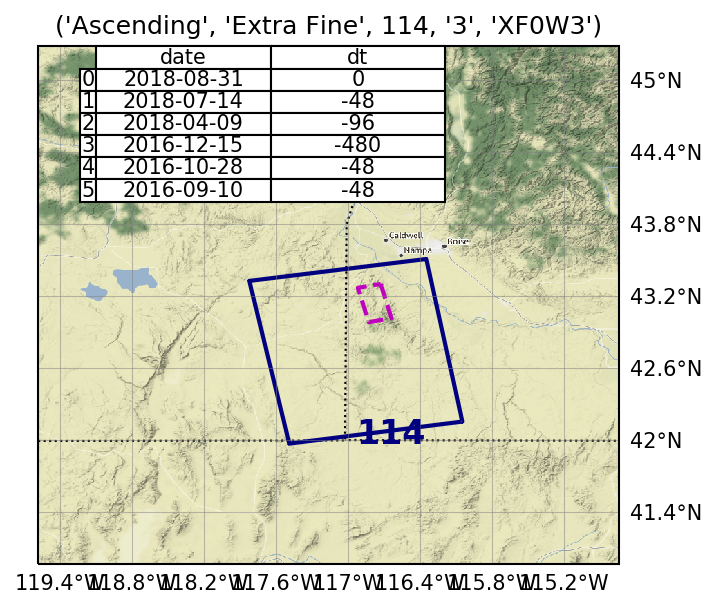

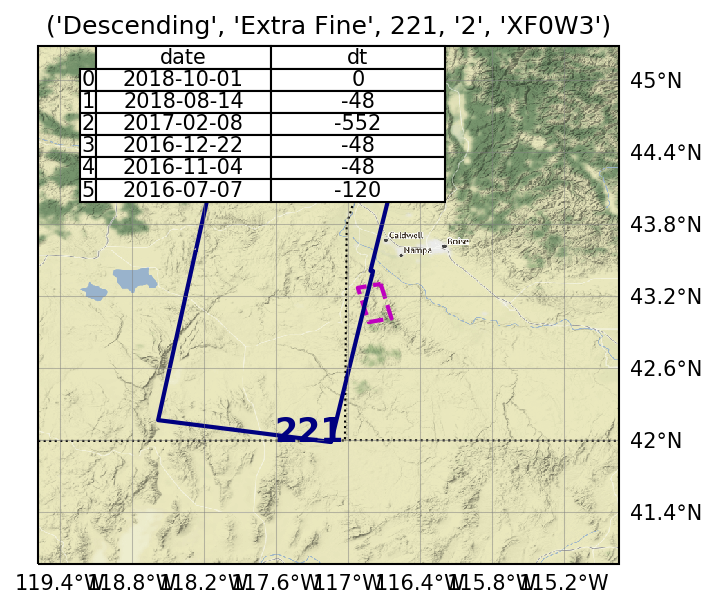

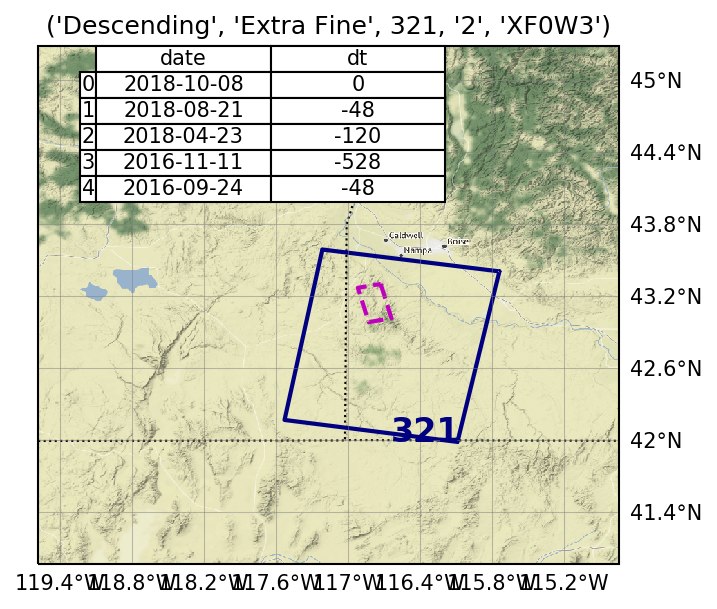

In [36]:
# Print maps for all combinations of possible interferometric pairs!
for labels, indices in GB.groups.items():
    #print(labels, indices)
    #print(labels, DF.loc[indices, "Scene ID"].tolist())
    inventory = GF.loc[indices]
    tmp = print_dates(inventory)
    plot_map(inventory, snwe, vectorFile, title=str(labels), tableFrame=tmp)

In [37]:
def print_inventory(GF):
    ''' print list of dates from dataframe'''
    tmp = GF.loc[:, ['sceneId','sceneDate']].reset_index(drop=True)
    tmp.loc[:, 'timeStamp'] = pd.to_datetime(tmp.sceneDate)
    tmp['date'] = tmp.sceneDate.str[:10]
    timeDeltas = tmp.timeStamp.diff()
    tmp['dt'] = timeDeltas.dt.days
    tmp.loc[0, 'dt'] = 0
    tmp['dt'] = tmp.dt.astype('i2')
    return tmp.loc[:, ['sceneId','date','dt']]

In [38]:
print_inventory(inventory)

,sceneId,date,dt
0,671783,2018-10-08,0
1,660201,2018-08-21,-48
2,632470,2018-04-23,-120
3,518470,2016-11-11,-528
4,507610,2016-09-24,-48


In [49]:
# Forecast inventory based on 24 day increments
# Forecast upcoming acquisistion dates!
start = pd.to_datetime(inventory.sceneDate.iloc[0])
R = np.arange(5)
[start+x*pd.Timedelta(24,'D') for x in R]

[Timestamp('2018-10-08 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-11-25 00:00:00'),
 Timestamp('2018-12-19 00:00:00'),
 Timestamp('2019-01-12 00:00:00')]